In [362]:
import string
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from matplotlib import pyplot as plt

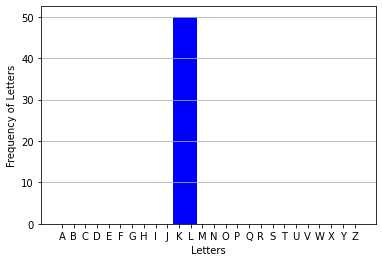

In [377]:
root = tk.Tk()
root.title("Caesar Cipher")
root.resizable(False, False)

    
def click_encryptButton():
    if (e1.get() != '') or (e2.get()!= '' or e2.get()!= ' '):
        str_res = caesar_cipher_Encryption(e1.get(), int(e2.get()))
        freq_res = freq_Plot(str_res)
        e3.delete('1.0', tk.END)
        e4.delete('1.0', tk.END)
        e3.insert(tk.END, str_res)
        e4.insert(tk.END, "The frequency of each letter is as follows: ")
        e4.insert(tk.END, freq_res)
        
        
    
def click_decryptButton():
    if (e1.get() != '') or (e2.get() != ''):
        str_result = caesar_cipher_Decryption(e1.get(), int(e2.get()))
        e3.delete('1.0', tk.END)
        e4.delete('1.0', tk.END)
        e3.insert(tk.END, str_result)
        
    

label1 = tk.Label(root,text = "Enter Plaintext/Ciphertext: ")
label2= tk.Label(root, text= "Enter Key: ")
label3 = tk.Label(root,text= "Result:")
label4 = tk.Label(root,text= "Frequency of Ciphertext: ")



encrypt_button= tk.Button(root, text="Encipher Text", command = click_encryptButton)
decrypt_button= tk.Button(root, text="Decipher Text", command = click_decryptButton)

e1= tk.Entry(root, width = 43)
e2= tk.Entry(root, width =43)
e3 = tk.Text(root, height = 1, width = 43)
e4 = tk.Text(root, height = 5, width = 43)

label1.grid(row=0)
label2.grid(row=1)
label3.grid(row=2)
label4.grid(row=10)
e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=10, column=1)


encrypt_button.grid(row=20, column=0)
decrypt_button.grid(row=20, column=1)
e1.grid()



frame = tk.Frame(root, width=30, height=20)
frame.grid()
frame.mainloop()




In [375]:
def caesar_cipher_Encryption(plain_text, key):
    alphabet = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    temp_arr = list(plain_text.upper()) #A list containing individual characters from user input string at upper case
    result_arr = list()
    for i in temp_arr:
        if i not in alphabet:
            result_arr.append(i)
        else:
            result_arr.append(alphabet[(alphabet.index(i) + key)%26])#modulus included for security concern in this implementaition
    alphabet.clear()
    temp_arr.clear()
    return ''.join(result_arr)  


In [335]:
def caesar_cipher_Decryption(cipher_text, key):
    alphabet = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    temp_arr = list(cipher_text.upper())
    result_arr = list()
    for i in temp_arr:
        if i not in alphabet:
            result_arr.append(i)
        else:
            result_arr.append(alphabet[(alphabet.index(i) - key)%26])
    alphabet.clear()
    temp_arr.clear()
    return ''.join(result_arr)        

In [360]:
def freq_Plot(cipher_text):
    alphabet = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    count = dict([letter,0] for letter in alphabet)
    
    for letter in list(cipher_text):
        if letter in alphabet:
            count[letter]+=1
    
    #Plotting Specifications for Frequency Graph  
    fig = plt.figure()
    let_plot = fig.add_subplot()
    let_plot.yaxis.grid(True)
    let_plot.set_ylabel('Frequency of Letters')
    x_axes = range(26)
    
    #Calculation for percentage of appearence of individual letters in the ciphertext
    let_plot.bar(x_axes, [(count[letter]/sum(count.values())) * 100 for letter in alphabet], width=1,color='b')
   
    #Specifications for x-axis in the frequency graph
    let_plot.set_xticks(x_axes)
    let_plot.set_xticklabels(alphabet)
    let_plot.set_xlabel('Letters')
    plt.show()
  
    #Iteration through the dictionary to mainatin all entries whose keys are not 0
    count = {x:y for x,y in count.items() if y!=0}
    return count
    
            
        